# Celdas generales

In [20]:
# Importar librerias
import numpy as np
import pandas as pd
import re
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [35]:
data = pd.read_csv("./DATA/pal-bel-rec.csv")
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,260.000000,2278.000000,1185.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,18380.880473,55641.345420,55641.345420,-34.579195,-58.424563,3.632685e+05,5.914885e+06,3.352254e+05,110.440236,97.807951,3084.490859,4005.219663,4.353846,3.124232,4957.555274,1.708031,0.211657,0.132689,0.118184,0.226162,0.140210,0.107709,0.186946,0.096428,0.178082,0.403169
std,11690.483710,33092.112741,33092.112741,0.013016,0.022606,4.587917e+05,5.497961e+06,3.115963e+05,96.497022,84.397246,805.794085,5551.008276,3.847200,1.543092,4722.856455,1.640241,0.408538,0.339284,0.322870,0.418401,0.347251,0.310054,0.389921,0.295216,0.382633,0.490600
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,4.900000e+04,5.898837e+05,3.343159e+04,21.000000,21.000000,1078.438387,1196.319018,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8613.500000,28841.500000,28841.500000,-34.589955,-58.440345,1.490000e+05,2.558452e+06,1.450000e+05,48.000000,43.000000,2545.454545,2823.529412,2.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16800.000000,52039.000000,52039.000000,-34.581963,-58.423297,2.478000e+05,4.234680e+06,2.400000e+05,81.000000,71.000000,2966.666667,3285.714286,3.000000,3.000000,3400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26597.000000,77604.000000,77604.000000,-34.567117,-58.404614,4.150000e+05,7.056518e+06,3.999273e+05,137.000000,122.500000,3513.513514,4000.000000,6.000000,4.000000,6232.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,40565.000000,121158.000000,121158.000000,-34.546880,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,967.000000,967.000000,5494.505495,101851.557143,22.000000,15.000000,54240.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#Dummies con los 3 barrios
series = data['BARRIO']
dummies = pd.get_dummies(series, prefix='BARRIO',drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,index_right,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,PAIS,PROVINCIA,CIUDAD-PARTIDO,SUBBARRIO,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,geometry,BARRIO_PALERMO,BARRIO_RECOLETA
0,17046,PALERMO,53051,53051,apartment,"-34.578631,-58.4046973",-34.578631,-58.404697,125000.0,USD,2205562.5,125000.0,30.0,30.0,4166.666667,4166.666667,NaN,2.0,NaN,http://www.properati.com.ar/19kfe_venta_depart...,Superficie de 30 metros totales. APTO CREDITO1...,DEPARTAMENTO DE 2 AMBIENTES,https://thumbs4.properati.com/6/jX9QFXI0_lNyEB...,Argentina,Capital Federal,Capital Federal,Palermo Chico,2,0,0,0,0,0,0,0,0,0,0,POINT (-58.4046973 -34.578631),1,0
1,4864,PALERMO,17288,17288,apartment,"-34.5786231,-58.406939",-34.578623,-58.406939,1700000.0,USD,29995650.0,1700000.0,506.0,377.0,3359.683794,4509.283820,NaN,5.0,NaN,http://www.properati.com.ar/171ea_venta_depart...,Excelente Penthouse duplex sobre Av. del Liber...,Av. del Libertador 2600 - Espectacular Penthou...,https://thumbs4.properati.com/1/eo0KBdsF-yMKZr...,Argentina,Capital Federal,Capital Federal,Palermo Chico,0,0,0,0,0,0,0,0,0,0,1,POINT (-58.406939 -34.5786231),1,0
2,13943,PALERMO,43955,43955,apartment,"-34.5785701327,-58.4046927983",-34.578570,-58.404693,960000.0,USD,16938720.0,960000.0,279.0,249.0,3440.860215,3855.421687,NaN,6.0,NaN,http://www.properati.com.ar/18ze1_venta_depart...,"Excelente edificio en esquina, 55 años con coc...",San Martin de Tours 2800,https://thumbs4.properati.com/1/ReRNEFxbIj-ZOY...,Argentina,Capital Federal,Capital Federal,Palermo Chico,0,0,0,0,0,0,0,0,0,0,1,POINT (-58.4046927983 -34.5785701327),1,0
3,6922,PALERMO,22867,22867,apartment,"-34.5785431,-58.4071007",-34.578543,-58.407101,780000.0,USD,13762710.0,780000.0,190.0,179.0,4105.263158,4357.541899,NaN,5.0,NaN,http://www.properati.com.ar/17k0z_venta_depart...,"Piso alto, palier privadoLiving y Comedor con ...","Piso sobre Libertador, con dependencia, balcón...",https://thumbs4.properati.com/6/IwYZAnN1bdMPtk...,Argentina,Capital Federal,Capital Federal,Palermo Chico,0,0,0,0,0,0,0,0,0,0,1,POINT (-58.4071007 -34.5785431),1,0
4,18983,PALERMO,57911,57911,apartment,"-34.578518,-58.404894",-34.578518,-58.404894,275000.0,USD,4852237.5,275000.0,77.0,77.0,3571.428571,3571.428571,NaN,2.0,NaN,http://www.properati.com.ar/19uen_venta_depart...,JUNIN Y VCTE. LOPEZDepartamento tipo Loft en e...,JUNIN 1600,https://thumbs4.properati.com/5/gXXipPruxu03OG...,Argentina,Capital Federal,Capital Federal,Recoleta,1,0,0,0,0,0,0,0,0,0,1,POINT (-58.40489399999999 -34.578518),1,0


In [37]:
data.groupby(by = 'SUBBARRIO').count()

,index_right,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,PAIS,PROVINCIA,CIUDAD-PARTIDO,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,geometry,BARRIO_PALERMO,BARRIO_RECOLETA
SUBBARRIO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abasto,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Almagro,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,4,8,4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Balvanera,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Barrio Norte,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,20,355,141,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497
Belgrano,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,54,557,348,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952,952
Centro / Microcentro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chacarita,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Coghlan,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,3,3,6,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Colegiales,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,3,14,7,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [49]:
data.columns

Index(['index_right', 'BARRIO', 'Unnamed: 0', 'ID', 'TIPO_PROPIEDAD',
       'lat-lon', 'latitud', 'longitud', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'PAIS', 'PROVINCIA', 'CIUDAD-PARTIDO', 'SUBBARRIO',
       'Ambientes', 'pileta', 'amenities', 'gimnasio', 'laundry', 'sum',
       'solarium', 'parrilla', 'a estrenar', 'subte', 'cochera', 'geometry',
       'BARRIO_PALERMO', 'BARRIO_RECOLETA'],
      dtype='object')

In [50]:
data = data[(data['TIPO_PROPIEDAD'] == 'apartment')]
#3417 registros

In [51]:
pd.set_option('display.max_columns', 500)
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,BARRIO_PALERMO,BARRIO_RECOLETA
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3.417000e+03,3.417000e+03,3.417000e+03,3417.000000,3417.000000,3417.000000,3417.000000,235.000000,2169.000000,1136.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,18439.486099,55806.441323,55806.441323,-34.579069,-58.424159,3.502808e+05,5.673386e+06,3.215385e+05,102.475856,91.447761,3121.989675,4071.945592,4.570213,3.108806,5083.559859,1.730465,0.220369,0.144279,0.127597,0.241147,0.149839,0.115013,0.180568,0.101551,0.184080,0.417618,0.455956,0.320749
std,11716.451431,33160.612485,33160.612485,0.012977,0.022723,4.431546e+05,5.094188e+06,2.887125e+05,80.603353,71.716490,780.645209,5688.043453,3.935154,1.552632,4769.690811,1.597968,0.414556,0.351423,0.333690,0.427842,0.356966,0.319085,0.384716,0.302101,0.387606,0.493239,0.498129,0.466833
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,5.800000e+04,5.898837e+05,3.343159e+04,21.000000,21.000000,1078.438387,1196.319018,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8607.000000,28825.000000,28825.000000,-34.589880,-58.440432,1.450000e+05,2.523164e+06,1.430000e+05,46.000000,42.000000,2590.909091,2857.142857,2.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16984.000000,52793.000000,52793.000000,-34.581818,-58.423297,2.400000e+05,4.181746e+06,2.370000e+05,78.000000,70.000000,3000.000000,3329.166667,4.000000,3.000000,3500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26639.000000,77755.000000,77755.000000,-34.566941,-58.404093,3.990000e+05,6.881355e+06,3.900000e+05,130.000000,117.000000,3532.467532,4032.258065,6.000000,4.000000,6500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,40565.000000,121158.000000,121158.000000,-34.549922,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,789.000000,690.000000,5487.804878,101851.557143,22.000000,15.000000,54240.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Primer modelado

## 1.0. Preparación de datos

In [135]:
data_aux = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA']]

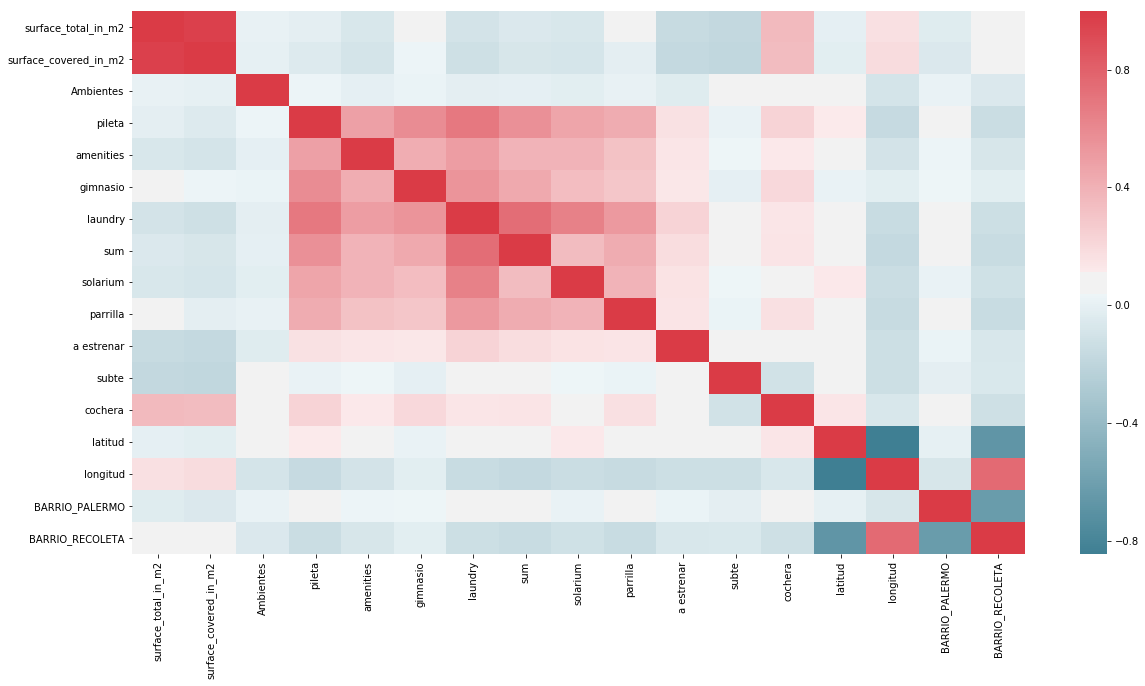

In [136]:
plt.figure(figsize=(20,10))
sns.heatmap(data_aux.corr(),
            xticklabels=data_aux.columns.values,
            yticklabels=data_aux.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [137]:
#Split train y test 
X_train, X_test, y_train, y_test = train_test_split(data_aux, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 17) (2391,)
(1026, 17) (1026,)


In [138]:
# Normalización (para Ridge y Lasso)
se = StandardScaler()
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

## 1.1. Regresión lineal

In [139]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [-9.45463097e+00  9.59888611e+00 -2.04140962e+01  3.76418459e+02
  1.64579778e+02  4.44044449e+02  2.92154415e+02 -2.47083445e+02
 -1.17780080e+02 -2.90494042e+01  2.23782186e+02 -7.22483571e+01
  2.84152934e+02  2.89383634e+04  2.04863777e+04  1.87130657e+02
 -7.91219587e+01]
Residual sum of squares: 359334.34
Varianza explicada: 0.40



In [140]:
# Un cross validation
results = cross_val_score(regr,X_train,y_train,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.37648625 0.36325469 0.42899647 0.36440493 0.38929771]
0.38448801018191603
0.02417580947313203


In [141]:
# Y probando en el test:
pred_test = regr.predict(X_test)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



## 1.2. Regresión Lasso 

In [143]:
regr2=linear_model.LassoCV(cv=10).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Alpha
print('alpha: %.2f\n' % regr2.alpha_)
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

Regresión Lasso
alpha: 0.29

Coeficientes: [-753.22574774  674.24656005  -32.4368606   154.78354668   56.82972209
  147.1064149   123.08813121  -85.65600679  -35.66668901  -11.29575786
   68.58573643  -28.24538916  140.25018545  378.10286326  465.28102624
   94.08977808  -34.48099458]

Residual sum of squares: 359342.73

Varianza explicada: 0.40



In [120]:
# Y probando en el test:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



Ridge

In [144]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.38,1.39,1.5,1.6,3.0,5.0,7.0,10.0])
regr3.fit(X_train_s,y_train)

print ('Regresión Ridge')
# Alpha
print('alpha: %.2f\n' % regr3.alpha_)
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("\nResidual sum of squares: %.2f"
 % np.mean((regr3.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('\nVarianza explicada: %.2f\n' % regr3.score(X_train_s, y_train))

Regresión Ridge
alpha: 1.39

Coeficientes: [-748.79619461  669.72271977  -32.69069021  154.93049684   57.06455842
  147.18611496  124.73474544  -86.86109553  -36.59103261  -12.03525288
   68.81931731  -28.49715501  140.45916185  378.08130907  466.61829878
   93.15138218  -36.39549205]

Residual sum of squares: 359346.04

Varianza explicada: 0.40



In [148]:
# Y probando en el test:
pred_test = regr3.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



Las 3 dieron lo mismo. Lasso no nos sacó features, podemos probar chequear la significatividad de las mismas y sacar quizás alguna

# 2. Probando Eliminar Features y Análisis de errores

## 2.1. Eliminar features

Voy a ver qué features tienen poca significatividad y correr el modelo sin ellas a ver qué pasa

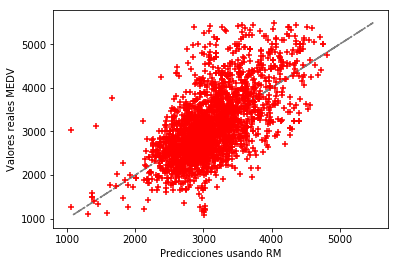

EMC: 359334.33581567777
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     92.55
Date:                Sat, 29 Sep 2018   Prob (F-statistic):          6.98e-247
Time:                        11:34:20   Log-Likelihood:                -18686.
No. Observations:                2391   AIC:                         3.741e+04
Df Residuals:                    2373   BIC:                         3.751e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [149]:
# Agregar constante
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

'parrilla' y 'BARRIO_RECOLETA' parecen ser las menos significativas. Nueva prueba sacándolas:

In [150]:
data_aux2 = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta',
       'gimnasio', 'laundry', 'sum', 'solarium', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(data_aux2, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 14) (2391,)
(1026, 14) (1026,)


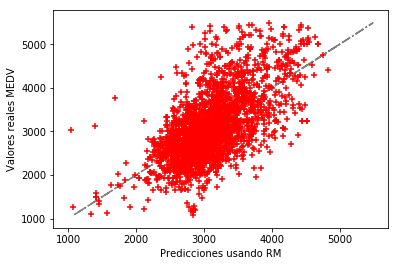

EMC: 361737.90502709674
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sat, 29 Sep 2018   Prob (F-statistic):          1.59e-246
Time:                        11:35:06   Log-Likelihood:                -18693.
No. Observations:                2391   AIC:                         3.742e+04
Df Residuals:                    2376   BIC:                         3.750e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [152]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

El R2 y el R2 ajustado empeoran ligeramente, probando en el test:

In [153]:
pred_test = regr2.predict(X_test_s)
print('R2 (test): %.2f\n' % r2_score(y_test, pred_test))

R2 (test): 0.36



No cambia... 'carajo, mierda!'

## 2.2. Análisis de errores

In [167]:
# Los mayores errores proporcionalmente se dan al sobrevaluar propiedades baratas

data_e = X_train
data_e['error'] = y_train - predictions
data_e['error_abs'] = np.abs(y_train - predictions)
data_e['precioxm2'] = y_train
data_e['pred'] = predictions
data_e['error_prop'] = data_e['error'] / data_e['precioxm2']
data_e['error_prop_abs'] = data_e['error_abs'] / data_e['precioxm2']
data_e.sort_values(by='error_prop_abs',ascending=False).head(20)

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,gimnasio,laundry,sum,solarium,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,error,error_abs,precioxm2,pred,error_proporcional,error_prop,error_prop_abs
473,1.0,31.0,24.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1765.295892,1765.295892,1078.438387,2843.734279,1.636900,-1.636900,1.636900
467,1.0,31.0,24.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1685.367828,1685.367828,1158.366452,2843.734279,1.454952,-1.454952,1.454952
471,1.0,34.0,24.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1647.792734,1647.792734,1167.442647,2815.235381,1.411455,-1.411455,1.411455
469,1.0,37.0,32.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1661.170877,1661.170877,1202.374865,2863.545742,1.381575,-1.381575,1.381575
476,1.0,42.0,37.0,2,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1628.379350,1628.379350,1214.430476,2842.809826,1.340858,-1.340858,1.340858
472,1.0,31.0,25.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1630.878017,1630.878017,1222.457419,2853.335437,1.334098,-1.334098,1.334098
468,1.0,31.0,25.0,1,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1568.644792,1568.644792,1284.690645,2853.335437,1.221029,-1.221029,1.221029
479,1.0,47.0,36.0,2,0,0,0,0,0,0,0,1,-34.588889,-58.430556,1,-1517.210080,1517.210080,1268.500426,2785.710506,1.196066,-1.196066,1.196066
883,1.0,54.0,38.0,1,0,0,0,0,0,0,0,0,-34.568841,-58.446930,1,-1398.769274,1398.769274,1351.851852,2750.621126,1.034706,-1.034706,1.034706
2229,1.0,187.0,187.0,0,0,0,0,0,0,0,0,1,-34.564858,-58.454128,0,-1497.988439,1497.988439,1470.588235,2968.576674,1.018632,-1.018632,1.018632


In [168]:
data_e.sort_values(by='error_abs',ascending=False).head(20)

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,gimnasio,laundry,sum,solarium,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,error,error_abs,precioxm2,pred,error_proporcional,error_prop,error_prop_abs
221,1.0,529.0,431.0,0,0,0,0,0,0,0,0,1,-34.583042,-58.400016,1,2565.596998,2565.596998,5387.523629,2821.926631,0.476211,0.476211,0.476211
454,1.0,120.0,110.0,0,0,0,0,0,0,0,0,0,-34.586167,-58.408298,1,2332.407688,2332.407688,5416.666667,3084.258979,0.430598,0.430598,0.430598
1232,1.0,56.0,51.0,2,0,0,0,0,0,0,0,0,-34.577761,-58.424323,1,2251.080613,2251.080613,5267.857143,3016.776530,0.427324,0.427324,0.427324
2857,1.0,330.0,300.0,0,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,2220.445256,2220.445256,5303.030303,3082.585047,0.418713,0.418713,0.418713
3003,1.0,342.0,298.0,5,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,2127.590791,2127.590791,4970.760234,2843.169443,0.428021,0.428021,0.428021
440,1.0,78.0,73.0,3,0,0,0,0,0,0,0,0,-34.586732,-58.409907,1,2112.728799,2112.728799,5128.205128,3015.476329,0.411982,0.411982,0.411982
3193,1.0,43.0,40.0,2,0,0,0,0,0,0,0,0,-34.590962,-58.406078,0,2112.112860,2112.112860,4883.720930,2771.608070,0.432480,0.432480,0.432480
804,1.0,130.0,130.0,0,0,0,0,0,0,0,0,0,-34.563342,-58.436630,1,2082.900824,2082.900824,5384.615385,3301.714560,0.386824,0.386824,0.386824
2423,1.0,340.0,222.0,4,1,0,0,0,0,0,0,1,-34.571696,-58.467681,0,2068.252521,2068.252521,3764.705882,1696.453361,0.549380,0.549380,0.549380
2936,1.0,80.0,69.0,3,0,0,0,0,0,1,0,0,-34.589652,-58.406289,0,2064.672919,2064.672919,5000.000000,2935.327081,0.412935,0.412935,0.412935


In [161]:
data_e.describe()

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,gimnasio,laundry,sum,solarium,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,error,error_abs,precioxm2,pred,error_proporcional
count,2391.0,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2.391000e+03,2391.000000,2391.000000,2391.000000,2391.000000
mean,1.0,102.941865,91.448348,1.751568,0.217482,0.125889,0.238812,0.145128,0.109996,0.106232,0.189460,0.423254,-34.578998,-58.424182,0.451276,1.162263e-09,458.156388,3107.404924,3107.404924,0.154217
std,0.0,80.624884,71.149437,1.601311,0.412620,0.331793,0.426447,0.352303,0.312950,0.308198,0.391956,0.494178,0.013114,0.022866,0.497724,6.015723e+02,389.736009,773.188359,485.727268,0.147157
min,1.0,21.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.599730,-58.472364,0.000000,-1.807504e+03,0.373298,1078.438387,1045.539901,0.000113
25%,1.0,46.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.590050,-58.440513,0.000000,-3.932197e+02,162.477568,2572.522207,2796.911748,0.054264
50%,1.0,78.000000,70.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.581699,-58.423297,0.000000,-4.805282e+01,366.343646,2997.601918,3054.515555,0.119010
75%,1.0,130.500000,119.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-34.566774,-58.403828,1.000000,3.221597e+02,636.030736,3522.863636,3368.084381,0.211166
max,1.0,789.000000,690.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-34.549922,-58.384171,1.000000,2.565597e+03,2565.596998,5487.804878,4830.885865,1.636900


No handles with labels found to put in legend.


Text(0.5,1,'Histograma')

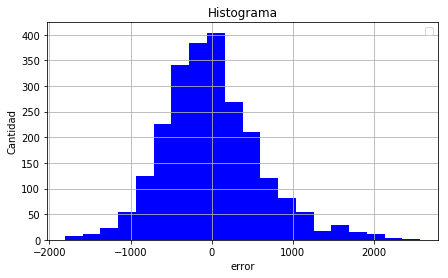

In [165]:
plt.figure(figsize=(7, 4))
plt.hist(data_e.error,color = 'b', bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('error')
plt.ylabel('Cantidad')
plt.title('Histograma')

No handles with labels found to put in legend.


Text(0.5,1,'Histograma')

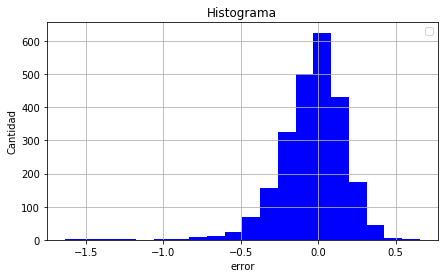

In [166]:
plt.figure(figsize=(7, 4))
plt.hist(data_e.error_prop,color = 'b', bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('error')
plt.ylabel('Cantidad')
plt.title('Histograma')

Los errores parecen ser mayores en términos absolutos subvaluando propiedades más caras, pero en términos relativos se sobrevalúa propiedades más baratas. Por lo general son casos con pocas dummies (muchos 'ceros'), pero no parece haber motivos para sacarlas. Lo ideal sería tener más features.

# 3. Segundo modelado con agregado de features